## Imports and Load data ##

In [2]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

train = pd.read_csv('../input/train.csv')
display(train.head())

,id,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,...,wheezy-myrtle-mandrill-entropy,wiggy-lilac-lemming-sorted,gloppy-cerise-snail-contributor,woozy-silver-havanese-gaussian,jumpy-thistle-discus-sorted,muggy-turquoise-donkey-important,blurry-buff-hyena-entropy,bluesy-chocolate-kudu-fepid,gamy-white-monster-expert,target
0,707b395ecdcbb4dc2eabea00e4d1b179,-2.070654,1.018160,0.228643,0.857221,0.052271,0.230303,-6.385090,0.439369,-0.721946,...,0.351895,0.618824,-1.542423,0.598175,0.611757,0.678772,0.247059,-0.806677,-0.193649,0
1,5880c03c6582a7b42248668e56b4bdec,-0.491702,0.082645,-0.011193,1.071266,-0.346347,-0.082209,0.110579,-0.382374,-0.229620,...,-0.645115,-1.246090,2.613357,-0.479664,1.581289,0.931258,0.151937,-0.766595,0.474351,0
2,4ccbcb3d13e5072ff1d9c61afe2c4f77,-1.680473,0.860529,-1.076195,0.740124,3.678445,0.288558,0.515875,0.920590,-1.223277,...,0.516422,0.130521,-0.459210,2.028205,-0.093968,-0.218274,-0.163136,-0.870289,0.064038,1
3,e350f17a357f12a1941f0837afb7eb8d,0.183774,0.919134,-0.946958,0.918492,0.862278,1.155287,0.911106,0.562598,-1.349685,...,-1.168967,1.385089,-0.353028,3.316150,-0.524087,-0.794327,3.936365,0.682989,-2.521211,0
4,a8f910ea6075b6376af079055965ff68,-0.203933,-0.177252,0.368074,-0.701320,-1.104391,0.735760,0.894273,-1.375826,-5.144946,...,-0.279168,1.544356,2.959727,1.641201,-0.130818,-0.264292,-0.748668,0.964218,0.087079,0


## Features distribution ##
All of the features seams to have normal distribution, we check that with normality plot.

 >>  2
[0, 0]
[0, 1]
[0, 2]
[0, 3]
[1, 0]
[1, 1]
[1, 2]
[1, 3]


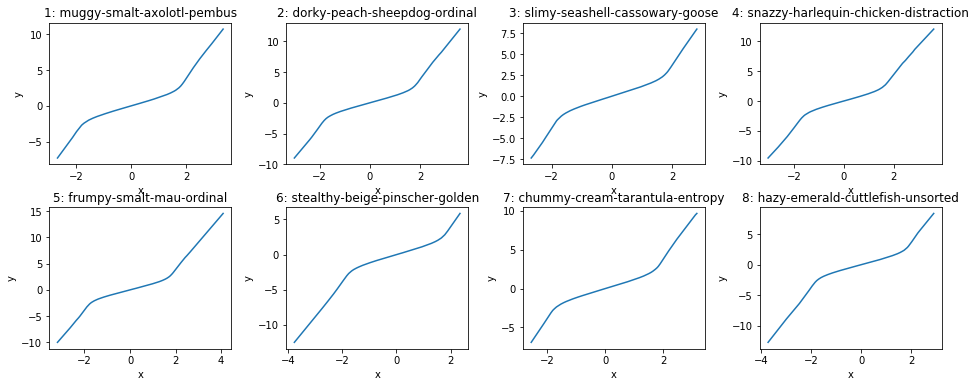

In [39]:
from scipy import stats

def plots_grid(rows, columns):
    fig, ax = plt.subplots(rows, columns, figsize=(16, 3 * 16 / 4 * rows / columns))
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    print(' >> ', len(ax))
    for i in range(rows * columns):
        print([i // columns,i % columns])
        yield ax[i // columns,i % columns]

def normality_plot(data, ax, title=None):
    x, y = stats.probplot(data)[0]
    if len(x) > 500:  # limit number of points
        idx = np.random.choice(len(x), 500)
        x, y = x[idx], y[idx]

    df = pd.DataFrame(zip(x, y), columns=['x', 'y'])

    plot = sbn.lineplot(x='x', y='y', data=df, ax=ax)
    if title:
        plot.set_title(title)

    
for i, ax in enumerate(plots_grid(2, 4), start=1):
    data = train[train.columns[i]]
    normality_plot(data, ax, f"{i}: {train.columns[i]}")
    
        
    

## Analyze wheezy-copper-turtle-magic ##

Checking normality plots we figured out that there is one feature wheezy-copper-turtle-magic (column 147), 
with ditribution different from the others.

Additionaly rest of the features in fact doesn't have normal distribution, but is composed of two normal distributions with different deviations.


'wheezy-copper-turtle-magic'

 >>  2
[0, 0]


IndexError: too many indices for array

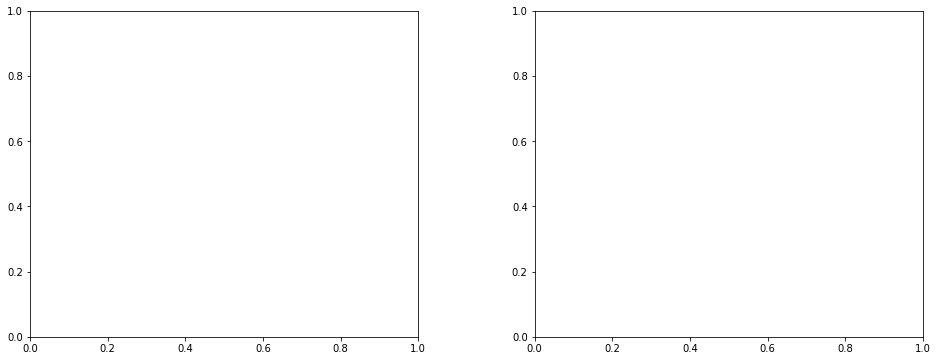

In [40]:
magic_col = train.columns[147]
display(magic_col)

# show magic column values distribution
axs =plots_grid(rows=1, columns=2)
sbn.distplot(train[magic_col], ax=next(axs))

# Show other columns distribution
sbn.distplot(train[train.columns[1]], ax=next(axs))

train[magic_col].describe()